In [ ]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from specific_func import downloading_json_file, split_json_to_dfs
import numpy as np

In [2]:
covid_json = "https://covid.ourworldindata.org/data/owid-covid-data.json"
response = downloading_json_file(covid_json)

In [3]:
country_information, country_key, combined_df = split_json_to_dfs(response)

In [5]:
drop_option = country_key['location'].to_list()

In [20]:
today = combined_df['date'].max()
print("Data last updated: {}".format(str(today.date())))

Data last updated: 2020-12-21


In [34]:
type(today)

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
df = combined_df.copy()
previous_date = combined_df[combined_df['date'] != today]['date'].max()
map_df = df[df['date'] == previous_date][['date', 'total_cases', 'country_code', 'location']]
map_df = map_df[map_df['location'] != 'World']
map_df

,date,total_cases,country_code,location
300,2020-12-20,49817.0,AFG,Afghanistan
587,2020-12-20,53003.0,ALB,Albania
887,2020-12-20,95203.0,DZA,Algeria
1181,2020-12-20,7577.0,AND,Andorra
1457,2020-12-20,16644.0,AGO,Angola
...,...,...,...,...
53528,2020-12-20,110075.0,VEN,Venezuela
53861,2020-12-20,1413.0,VNM,Vietnam
54451,2020-12-20,2087.0,YEM,Yemen
54729,2020-12-20,18716.0,ZMB,Zambia


Timestamp('2020-12-20 00:00:00')

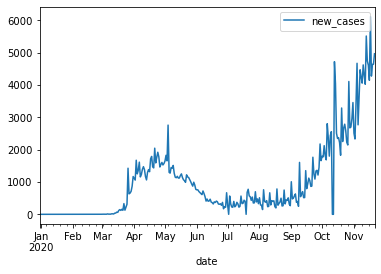

In [9]:
country_select = "Canada"
combined_df[combined_df.location == country_select].plot('date', 'new_cases')
plt.show()

In [10]:
combined_df[combined_df['new_cases'] < 0].head()

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,location,continent
5770,2020-05-20,-209.0,0.0,-17.240,0.000,57.41,-28.143,0.000,-2.321,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benin,Africa
15663,2020-05-07,-2461.0,49.0,-139.488,2.777,86.11,677.857,105.000,38.421,5.951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ecuador,South America
15665,2020-05-09,-1480.0,50.0,-83.886,2.834,86.11,354.571,91.571,20.097,5.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ecuador,South America
15668,2020-05-12,-50.0,18.0,-2.834,1.020,86.11,-338.857,82.286,-19.206,4.664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ecuador,South America
15786,2020-09-07,-8261.0,3800.0,-468.229,215.382,70.83,-552.000,567.000,-31.287,32.137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ecuador,South America


In [11]:
combined_df['new_cases'] = np.where(combined_df['new_cases'] <0, None, combined_df['new_cases'])

In [12]:
combined_df[combined_df['new_cases'] < 0].head()

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,location,continent


In [35]:
combined_df.columns.to_list()

['date',
 'location',
 'new_cases',
 'new_deaths',
 'new_cases_per_million',
 'new_deaths_per_million',
 'stringency_index',
 'new_cases_smoothed',
 'new_deaths_smoothed',
 'new_cases_smoothed_per_million',
 'new_deaths_smoothed_per_million',
 'total_cases',
 'total_cases_per_million',
 'total_deaths',
 'total_deaths_per_million',
 'reproduction_rate',
 'total_tests',
 'total_tests_per_thousand',
 'tests_units',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'new_tests',
 'new_tests_per_thousand',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'continent']

In [13]:
combined_df

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,location,continent
0,2019-12-31,0,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
1,2020-01-01,0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
2,2020-01-02,0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
3,2020-01-03,0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
4,2020-01-04,0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57924,2020-11-17,543479,8560.0,69.723,1.098,NaN,590026.286,9149.000,75.695,1.174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN
57925,2020-11-18,580828,10701.0,74.515,1.373,NaN,592135.429,9232.571,75.965,1.184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN
57926,2020-11-19,624906,11070.0,80.170,1.420,NaN,592511.286,9296.286,76.014,1.193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN
57927,2020-11-20,636644,10642.0,81.675,1.365,NaN,590957.714,9510.286,75.814,1.220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN


In [14]:
country_information

,index,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,extreme_poverty,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,597.029,9.59,37.746,0.5,64.83,0.498,NaN,NaN,NaN
1,ALB,Europe,Albania,2.8778e+06,104.871,38,13.188,8.643,11803.4,304.195,10.08,NaN,2.89,78.57,0.785,1.1,7.1,51.2
2,DZA,Africa,Algeria,4.3851e+07,17.348,29.1,6.211,3.857,13913.8,278.364,6.73,83.741,1.9,76.88,0.754,0.5,0.7,30.4
3,AND,Europe,Andorra,77265,163.755,NaN,NaN,NaN,NaN,109.135,7.97,NaN,NaN,83.73,0.858,NaN,29,37.8
4,AGO,Africa,Angola,3.28663e+07,23.89,16.8,2.405,1.362,5819.49,276.045,3.94,26.664,NaN,61.15,0.581,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,ESH,Africa,Western Sahara,597330,NaN,28.4,NaN,1.38,NaN,NaN,NaN,NaN,NaN,70.26,NaN,NaN,NaN,NaN
211,YEM,Asia,Yemen,2.9826e+07,53.508,20.3,2.922,1.583,1479.15,495.003,5.35,49.542,0.7,66.12,0.452,18.8,7.6,29.2
212,ZMB,Africa,Zambia,1.8384e+07,22.995,17.7,2.48,1.542,3689.25,234.499,3.94,13.938,2,63.89,0.588,57.5,3.1,24.7
213,ZWE,Africa,Zimbabwe,1.48629e+07,42.729,19.6,2.822,1.882,1899.78,307.846,1.82,36.791,1.7,61.49,0.535,21.4,1.6,30.7


In [40]:
dict(zip(country_key.continent, country_key.location))

{'Asia': 'Yemen',
 'Europe': 'Vatican',
 'Africa': 'Zimbabwe',
 'North America': 'United States Virgin Islands',
 'South America': 'Venezuela',
 'Oceania': 'Wallis and Futuna',
 nan: 'World'}

In [51]:
country_key[['location', 'continent']]

,location,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
210,Western Sahara,Africa
211,Yemen,Asia
212,Zambia,Africa
213,Zimbabwe,Africa


In [53]:
country_continent = dict(zip(country_key.location, country_key.continent))

In [54]:
country_continent['Canada']

'North America'

In [57]:
def check_continent(country):
    country_continent = dict(zip(country_key.location, country_key.continent))
    continent_name = country_continent[country]
    return continent_name

In [61]:
continent = check_continent('Canada')

In [70]:
combined_df[(combined_df['continent'] == continent) & (combined_df['date'] == today)][['location', 'total_cases']].sort_values('total_cases', ascending = False)

,location,total_cases
55044,United States,11913944.0
34557,Mexico,1025969.0
9917,Canada,320719.0
40702,Panama,152289.0
15534,Dominican Republic,136784.0
12471,Costa Rica,129418.0
22207,Guatemala,117757.0
23698,Honduras,103488.0
42566,Puerto Rico,81846.0
16436,El Salvador,37250.0
